In [1]:
%matplotlib inline
import plotly
import pandas as pd
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import ipywidgets as widgets

from shapely import wkt
from tabulate import tabulate
from sklearn import datasets
from dask import dataframe as dd
from shapely.geometry import Point
from matplotlib import pyplot as plt
from ipywidgets import interact, widgets
from matplotlib.widgets import Slider
from IPython.display import display

# Read the CSV file into a DataFrame
path_data = '../data/'
path_img = '../images/'
crashes = pd.read_csv(path_data + 'crashes.csv')

# Display the DataFrame
crashes.head()  # This will display the first few rows of the DataFrame


CRASH DATE CRASH TIME    BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0  12/14/2021      12:54   BROOKLYN   11217.0  40.687534 -73.977500   
1  12/14/2021      16:25        NaN       NaN  40.784615 -73.953964   
2  04/24/2022      15:35  MANHATTAN   10019.0  40.767242 -73.986206   
3  12/09/2021      20:20   BROOKLYN   11223.0  40.592070 -73.962990   
4  12/09/2021      23:15   BROOKLYN   11218.0  40.640835 -73.989670   

                  LOCATION  ON STREET NAME   CROSS STREET NAME  \
0    (40.687534, -73.9775)   FULTON STREET  SAINT FELIX STREET   
1  (40.784615, -73.953964)  EAST 93 STREET                 NaN   
2  (40.767242, -73.986206)  WEST 56 STREET            9 AVENUE   
3    (40.59207, -73.96299)   EAST 7 STREET     CRAWFORD AVENUE   
4   (40.640835, -73.98967)       12 AVENUE           41 STREET   

  OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 3  \
0             NaN  ...                            NaN   
1             NaN  ...                            NaN   
2             NaN  ...                            NaN   
3             NaN  ...                            NaN   
4             NaN  ...                            NaN   

   CONTRIBUTING FACTOR VEHICLE 4  CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  \
0                            NaN                            NaN       4487052   
1                            NaN                            NaN       4486581   
2                            NaN                            NaN       4521853   
3                            NaN                            NaN       4485150   
4                            NaN                            NaN       4485355   

                   VEHICLE TYPE CODE 1  VEHICLE TYPE CODE 2  \
0                                Sedan                 Bike   
1                                  Van                 Bike   
2  Station Wagon/Sport Utility Vehicle                 Bike   
3                                 Bike                  NaN   
4                                Sedan                 Bike   

   VEHICLE TYPE CODE 3  VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  year  
0                  NaN                  NaN                 NaN  2021  
1                  NaN                  NaN                 NaN  2021  
2                  NaN                  NaN                 NaN  2022  
3                  NaN                  NaN                 NaN  2021  
4                  NaN                  NaN                 NaN  2021  

[5 rows x 30 columns]

In [2]:
def custom_crash_date_parser(date_str):
    return pd.to_datetime(date_str, format='%m/%d/%Y')

In [3]:
crashes = pd.read_csv(path_data +'crashes.csv', parse_dates=['CRASH DATE'], date_parser=custom_crash_date_parser)
crashes

/tmp/ipykernel_43560/904341858.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  crashes = pd.read_csv(path_data +'crashes.csv', parse_dates=['CRASH DATE'], date_parser=custom_crash_date_parser)


CRASH DATE CRASH TIME    BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0     2021-12-14      12:54   BROOKLYN   11217.0  40.687534 -73.977500   
1     2021-12-14      16:25        NaN       NaN  40.784615 -73.953964   
2     2022-04-24      15:35  MANHATTAN   10019.0  40.767242 -73.986206   
3     2021-12-09      20:20   BROOKLYN   11223.0  40.592070 -73.962990   
4     2021-12-09      23:15   BROOKLYN   11218.0  40.640835 -73.989670   
...          ...        ...        ...       ...        ...        ...   
28200 2022-12-12      18:10   BROOKLYN   11215.0  40.668550 -73.990234   
28201 2022-10-12      20:25        NaN       NaN  40.570835 -74.169830   
28202 2022-11-28      16:13   BROOKLYN   11225.0  40.655956 -73.959960   
28203 2022-07-27      18:15  MANHATTAN   10019.0  40.766712 -73.982890   
28204 2022-09-15      19:49   BROOKLYN   11213.0  40.665916 -73.925470   

                      LOCATION        ON STREET NAME   CROSS STREET NAME  \
0        (40.687534, -73.9775)         FULTON STREET  SAINT FELIX STREET   
1      (40.784615, -73.953964)        EAST 93 STREET                 NaN   
2      (40.767242, -73.986206)        WEST 56 STREET            9 AVENUE   
3        (40.59207, -73.96299)         EAST 7 STREET     CRAWFORD AVENUE   
4       (40.640835, -73.98967)             12 AVENUE           41 STREET   
...                        ...                   ...                 ...   
28200   (40.66855, -73.990234)             12 STREET            4 AVENUE   
28201   (40.570835, -74.16983)      FOREST HILL ROAD     RICHMOND AVENUE   
28202   (40.655956, -73.95996)                   NaN                 NaN   
28203   (40.766712, -73.98289)        WEST 57 STREET            8 AVENUE   
28204   (40.665916, -73.92547)  EAST NEW YORK AVENUE    ROCKAWAY PARKWAY   

                 OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 3  \
0                            NaN  ...                            NaN   
1                            NaN  ...                            NaN   
2                            NaN  ...                            NaN   
3                            NaN  ...                            NaN   
4                            NaN  ...                            NaN   
...                          ...  ...                            ...   
28200                        NaN  ...                            NaN   
28201                        NaN  ...                            NaN   
28202  712       FLATBUSH AVENUE  ...                            NaN   
28203                        NaN  ...                            NaN   
28204                        NaN  ...                            NaN   

       CONTRIBUTING FACTOR VEHICLE 4  CONTRIBUTING FACTOR VEHICLE 5  \
0                                NaN                            NaN   
1                                NaN                            NaN   
2                                NaN                            NaN   
3                                NaN                            NaN   
4                                NaN                            NaN   
...                              ...                            ...   
28200                            NaN                            NaN   
28201                            NaN                            NaN   
28202                            NaN                            NaN   
28203                            NaN                            NaN   
28204                            NaN                            NaN   

       COLLISION_ID                  VEHICLE TYPE CODE 1  VEHICLE TYPE CODE 2  \
0           4487052                                Sedan                 Bike   
1           4486581                                  Van                 Bike   
2           4521853  Station Wagon/Sport Utility Vehicle                 Bike   
3           4485150                                 Bike                  NaN   
4           4485355                                Sedan                 Bike   


In [4]:
zones = pd.read_csv(path_data + 'taxi_zones.csv')
zones['the_geom'] = zones['the_geom'].apply(wkt.loads)
zones['centroid'] = zones['the_geom'].apply(lambda x : x.centroid)
zones['longitude'] = zones['centroid'].apply(lambda x : x.x)
zones['latitude'] = zones['centroid'].apply(lambda x : x.y)
zones

OBJECTID  Shape_Leng                                           the_geom  \
0           1    0.116357  MULTIPOLYGON (((-74.18445299999996 40.69499599...   
1           2    0.433470  MULTIPOLYGON (((-73.82337597260663 40.63898704...   
2           3    0.084341  MULTIPOLYGON (((-73.84792614099985 40.87134223...   
3           4    0.043567  MULTIPOLYGON (((-73.97177410965318 40.72582128...   
4           5    0.092146  MULTIPOLYGON (((-74.17421738099989 40.56256808...   
..        ...         ...                                                ...   
258       256    0.067915  MULTIPOLYGON (((-73.95834207500002 40.71330630...   
259       259    0.126750  MULTIPOLYGON (((-73.85107116191898 40.91037152...   
260       260    0.133514  MULTIPOLYGON (((-73.90175373399988 40.76077547...   
261       261    0.027120  MULTIPOLYGON (((-74.01332610899988 40.70503078...   
262       262    0.049064  MULTIPOLYGON (((-73.94383256699986 40.78285908...   

     Shape_Area                       zone  LocationID        borough  \
0      0.000782             Newark Airport           1            EWR   
1      0.004866                Jamaica Bay           2         Queens   
2      0.000314    Allerton/Pelham Gardens           3          Bronx   
3      0.000112              Alphabet City           4      Manhattan   
4      0.000498              Arden Heights           5  Staten Island   
..          ...                        ...         ...            ...   
258    0.000169  Williamsburg (South Side)         256       Brooklyn   
259    0.000395         Woodlawn/Wakefield         259          Bronx   
260    0.000422                   Woodside         260         Queens   
261    0.000034         World Trade Center         261      Manhattan   
262    0.000122             Yorkville East         262      Manhattan   

                                          centroid  longitude   latitude  
0    POINT (-74.17400027276304 40.691831206401325) -74.174000  40.691831  
1     POINT (-73.83129854302213 40.61674529165957) -73.831299  40.616745  
2     POINT (-73.84742223236718 40.86447368477527) -73.847422  40.864474  
3     POINT (-73.97696825691759 40.72375214158459) -73.976968  40.723752  
4     POINT (-74.18848410184935 40.55265928694546) -74.188484  40.552659  
..                                             ...        ...        ...  
258  POINT (-73.95990462730536 40.710879933377214) -73.959905  40.710880  
259  POINT (-73.85221545370123 40.897932025294516) -73.852215  40.897932  
260   POINT (-73.90630644197891 40.74423471780134) -73.906306  40.744235  
261   POINT (-74.01302277174901 40.70913894067164) -74.013023  40.709139  
262  POINT (-73.94651035601468 40.775932403149774) -73.946510  40.775932  

[263 rows x 10 columns]

In [5]:
crashes = crashes[crashes['LOCATION'].notnull()]
initial_crashes = crashes
crashes

CRASH DATE CRASH TIME    BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0     2021-12-14      12:54   BROOKLYN   11217.0  40.687534 -73.977500   
1     2021-12-14      16:25        NaN       NaN  40.784615 -73.953964   
2     2022-04-24      15:35  MANHATTAN   10019.0  40.767242 -73.986206   
3     2021-12-09      20:20   BROOKLYN   11223.0  40.592070 -73.962990   
4     2021-12-09      23:15   BROOKLYN   11218.0  40.640835 -73.989670   
...          ...        ...        ...       ...        ...        ...   
28200 2022-12-12      18:10   BROOKLYN   11215.0  40.668550 -73.990234   
28201 2022-10-12      20:25        NaN       NaN  40.570835 -74.169830   
28202 2022-11-28      16:13   BROOKLYN   11225.0  40.655956 -73.959960   
28203 2022-07-27      18:15  MANHATTAN   10019.0  40.766712 -73.982890   
28204 2022-09-15      19:49   BROOKLYN   11213.0  40.665916 -73.925470   

                      LOCATION        ON STREET NAME   CROSS STREET NAME  \
0        (40.687534, -73.9775)         FULTON STREET  SAINT FELIX STREET   
1      (40.784615, -73.953964)        EAST 93 STREET                 NaN   
2      (40.767242, -73.986206)        WEST 56 STREET            9 AVENUE   
3        (40.59207, -73.96299)         EAST 7 STREET     CRAWFORD AVENUE   
4       (40.640835, -73.98967)             12 AVENUE           41 STREET   
...                        ...                   ...                 ...   
28200   (40.66855, -73.990234)             12 STREET            4 AVENUE   
28201   (40.570835, -74.16983)      FOREST HILL ROAD     RICHMOND AVENUE   
28202   (40.655956, -73.95996)                   NaN                 NaN   
28203   (40.766712, -73.98289)        WEST 57 STREET            8 AVENUE   
28204   (40.665916, -73.92547)  EAST NEW YORK AVENUE    ROCKAWAY PARKWAY   

                 OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 3  \
0                            NaN  ...                            NaN   
1                            NaN  ...                            NaN   
2                            NaN  ...                            NaN   
3                            NaN  ...                            NaN   
4                            NaN  ...                            NaN   
...                          ...  ...                            ...   
28200                        NaN  ...                            NaN   
28201                        NaN  ...                            NaN   
28202  712       FLATBUSH AVENUE  ...                            NaN   
28203                        NaN  ...                            NaN   
28204                        NaN  ...                            NaN   

       CONTRIBUTING FACTOR VEHICLE 4  CONTRIBUTING FACTOR VEHICLE 5  \
0                                NaN                            NaN   
1                                NaN                            NaN   
2                                NaN                            NaN   
3                                NaN                            NaN   
4                                NaN                            NaN   
...                              ...                            ...   
28200                            NaN                            NaN   
28201                            NaN                            NaN   
28202                            NaN                            NaN   
28203                            NaN                            NaN   
28204                            NaN                            NaN   

       COLLISION_ID                  VEHICLE TYPE CODE 1  VEHICLE TYPE CODE 2  \
0           4487052                                Sedan                 Bike   
1           4486581                                  Van                 Bike   
2           4521853  Station Wagon/Sport Utility Vehicle                 Bike   
3           4485150                                 Bike                  NaN   
4           4485355                                Sedan                 Bike   


In [6]:
geometry = [Point(lon, lat) for lon, lat in zip(crashes['LONGITUDE'], crashes['LATITUDE'])]
crs = {'init': 'epsg:4326'}  # Assuming WGS84 coordinate system
points_gdf = gpd.GeoDataFrame(crashes, crs=crs, geometry=geometry)

# Check which region each point falls into
points_gdf['region'] = None
for index, point in points_gdf.iterrows():
    for region_index, region in zones.iterrows():
        if point.geometry.within(region['the_geom']):
            points_gdf.at[index, 'region'] = region['zone']
            points_gdf.at[index, 'BOROUGH'] = region['borough']
            break

/home/cristian/miniforge3/envs/dv/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [7]:
points_gdf = points_gdf[~points_gdf['region'].isna()]
groupby_year_zone = points_gdf.groupby(['year', 'region']).size().reset_index(name='count').sort_values(by=['year', 'count'], ascending=False)
groupby_year_zone[groupby_year_zone['year'] == 2019].head(10)

year                region  count
53   2019   Crown Heights North    142
21   2019          Borough Park     93
12   2019               Bedford     90
167  2019            Park Slope     87
66   2019     East Harlem North     86
81   2019  Flatbush/Ditmas Park     83
71   2019          East Village     82
210  2019      Sunset Park West     81
4    2019               Astoria     79
37   2019  Central Harlem North     76

In [8]:
groupby_year_zone[groupby_year_zone['year'] == 2020].head(10)

year                    region  count
299  2020       Crown Heights North    129
276  2020            Bushwick South    123
281  2020      Central Harlem North     99
257  2020                   Bedford     98
249  2020                   Astoria     92
361  2020           Jackson Heights     89
312  2020         East Harlem North     85
314  2020             East New York     78
471  2020  Washington Heights South     76
266  2020              Borough Park     75

In [9]:
groupby_year_zone[groupby_year_zone['year'] == 2021].head(10)

year                region  count
548  2021   Crown Heights North    157
705  2021      Sunset Park West    128
525  2021        Bushwick South    125
505  2021               Bedford    123
495  2021               Astoria    106
530  2021  Central Harlem North    103
569  2021              Elmhurst    103
611  2021       Jackson Heights    103
575  2021  Flatbush/Ditmas Park    100
563  2021         East New York     99

In [10]:
groupby_year_zone[groupby_year_zone['year'] == 2022].head(10)

year                     region  count
952  2022           Sunset Park West    154
794  2022        Crown Heights North    149
772  2022             Bushwick South    131
762  2022               Borough Park    113
753  2022                    Bedford    110
908  2022                 Park Slope    108
917  2022  Prospect-Lefferts Gardens    108
950  2022                  Sunnyside    106
744  2022                    Astoria    101
858  2022            Jackson Heights    100

In [11]:
df_2019 = groupby_year_zone[groupby_year_zone['year'] == 2019].head(10)
df_2020 = groupby_year_zone[groupby_year_zone['year'] == 2020].head(10)
df_2021 = groupby_year_zone[groupby_year_zone['year'] == 2021].head(10)
df_2022 = groupby_year_zone[groupby_year_zone['year'] == 2022].head(10)
df = pd.concat([df_2019, df_2020, df_2021, df_2022])

In [12]:
### I want to plot the data per year

In [13]:

def plot_data(year, save = False):
    plt.figure(figsize=(10, 6))
    plt.plot(df[df['year'] == year]['region'], df[df['year'] == year]['count'], marker='o')
    plt.title(f'Data for {year}')
    plt.xlabel('Region')
    plt.ylabel('Number of crashes')
    plt.grid(True)
    plt.xticks(rotation=45)
    if save: 
        plt.savefig(path_img + "zone_crashes_" + str(year) + ".png", bbox_inches = 'tight')
    else:
        plt.show()

interact(plot_data, year=widgets.Dropdown(options=df['year'].unique(), description='Year:'))


interactive(children=(Dropdown(description='Year:', options=(2019, 2020, 2021, 2022), value=2019), Checkbox(va…

<function __main__.plot_data(year, save=False)>

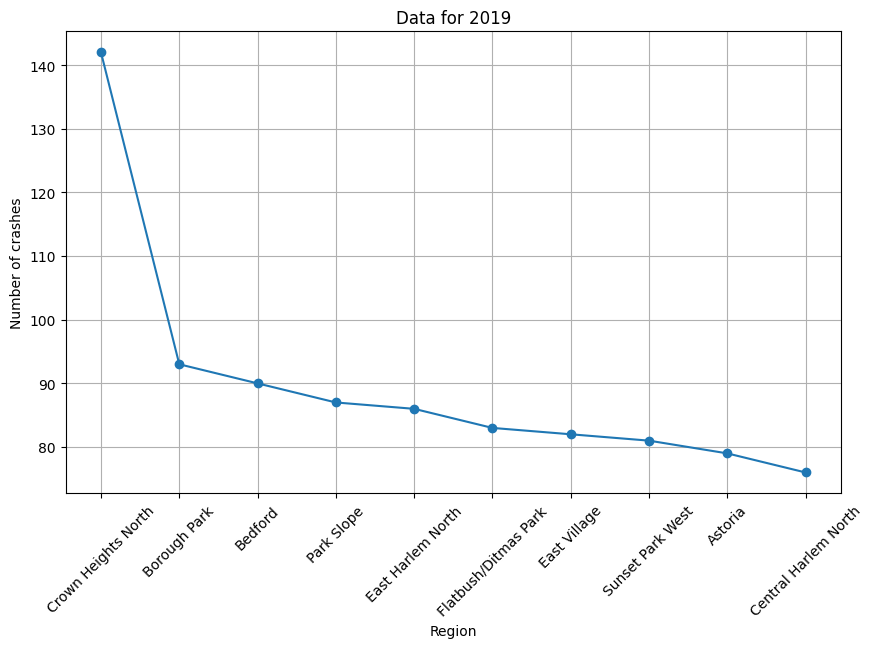

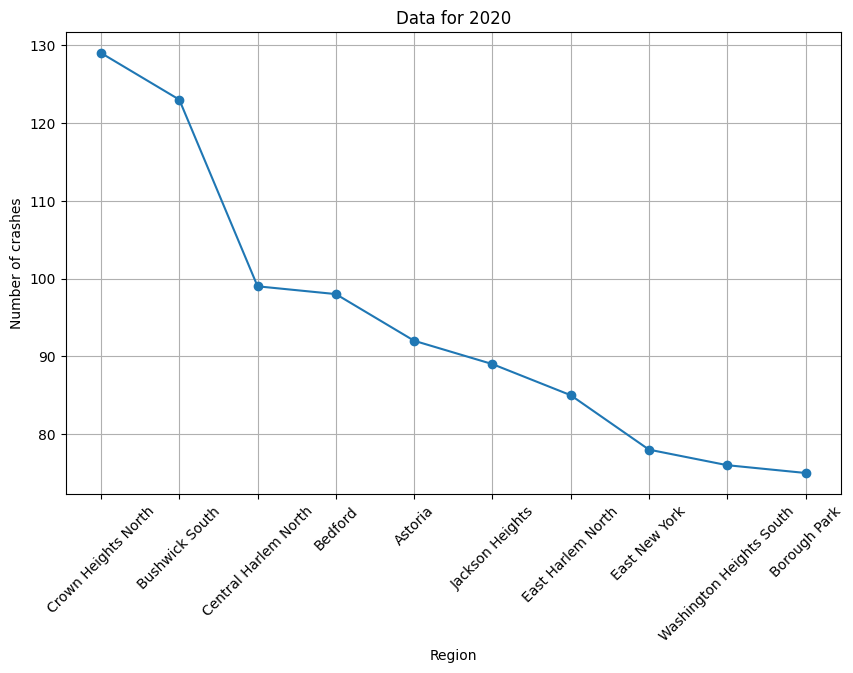

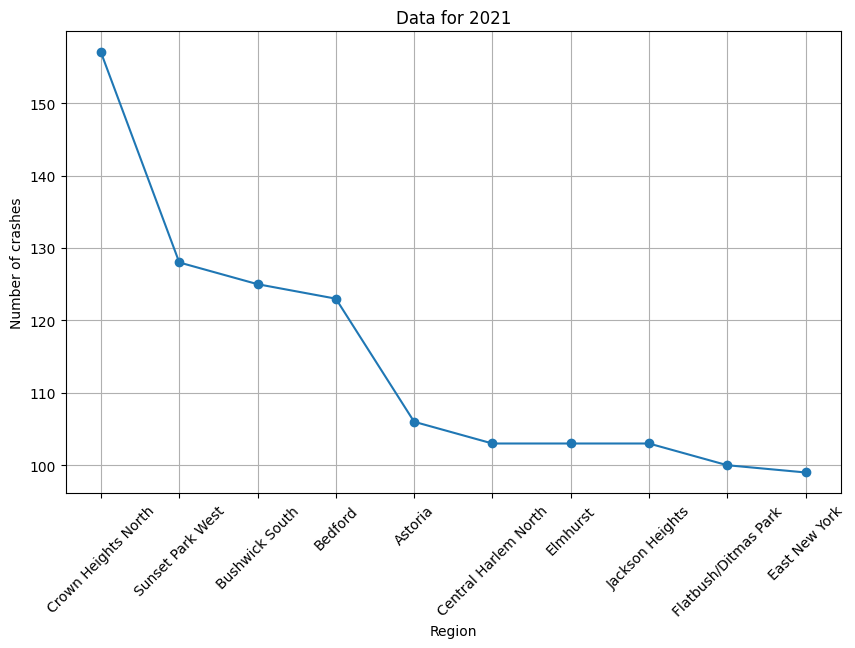

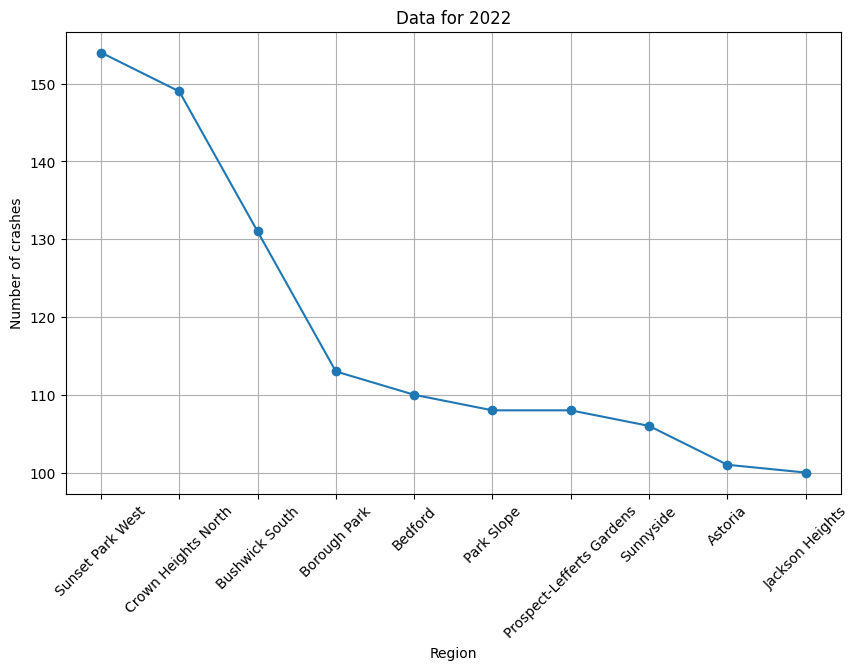

In [14]:
options=df['year'].unique()
for x in options:
    plot_data(x, save = True)

In [15]:
number_crashes_data = df
def plot_data(year, save=False):
    plt.figure(figsize=(10, 6))
    colors = sns.color_palette('tab10', n_colors=10)
    grouped_data = number_crashes_data[number_crashes_data['year'] == year]
    sns.barplot(x=grouped_data['region'], y=grouped_data["count"], palette=colors)
    plt.title(f'Data for {year}')
    plt.xlabel('Region')
    plt.ylabel('Number of crashes')
    plt.xticks(rotation=0)
    plt.grid(True)
    plt.xticks(rotation=45)
    if save: 
        plt.savefig(path_img + "zone_crashes_barplots" + str(year) + ".png", bbox_inches = 'tight')
    else:
        plt.show()

interact(plot_data, year=widgets.Dropdown(options=df['year'].unique(), description='Year:'))


interactive(children=(Dropdown(description='Year:', options=(2019, 2020, 2021, 2022), value=2019), Checkbox(va…

<function __main__.plot_data(year, save=False)>

/tmp/ipykernel_43560/1588230763.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_data['region'], y=grouped_data["count"], palette=colors)
/tmp/ipykernel_43560/1588230763.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_data['region'], y=grouped_data["count"], palette=colors)
/tmp/ipykernel_43560/1588230763.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_data['region'], y=grouped_data["count"], palette=colors)
/tmp/ipykernel_43560/1588230763.py:6: FutureWarning: 

Passing `palette` without assigning `hu

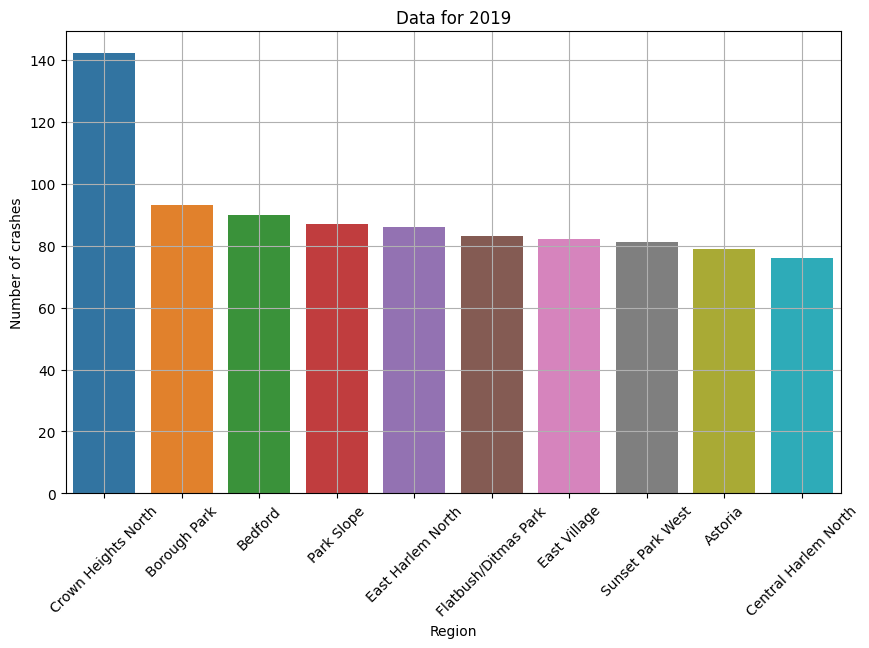

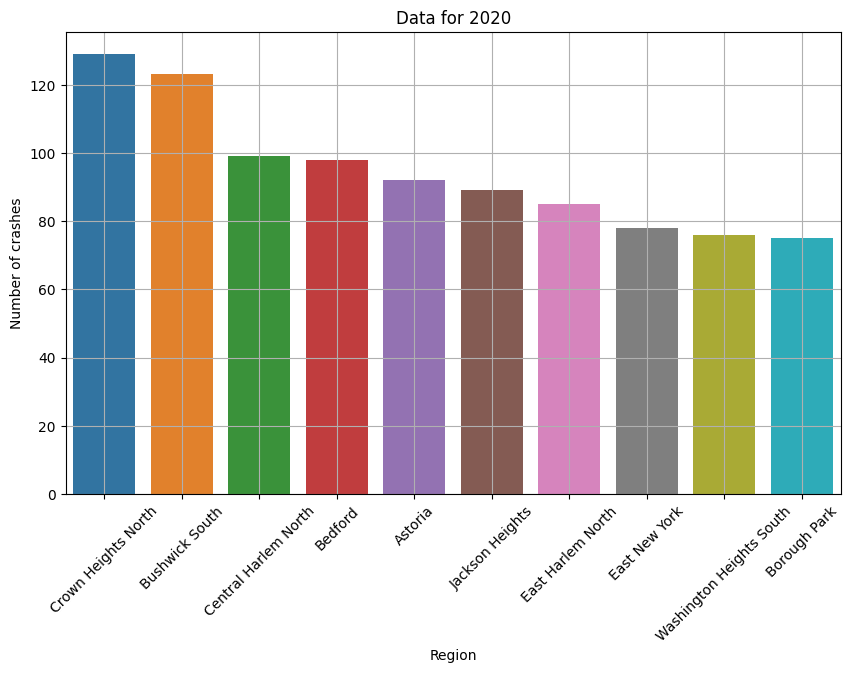

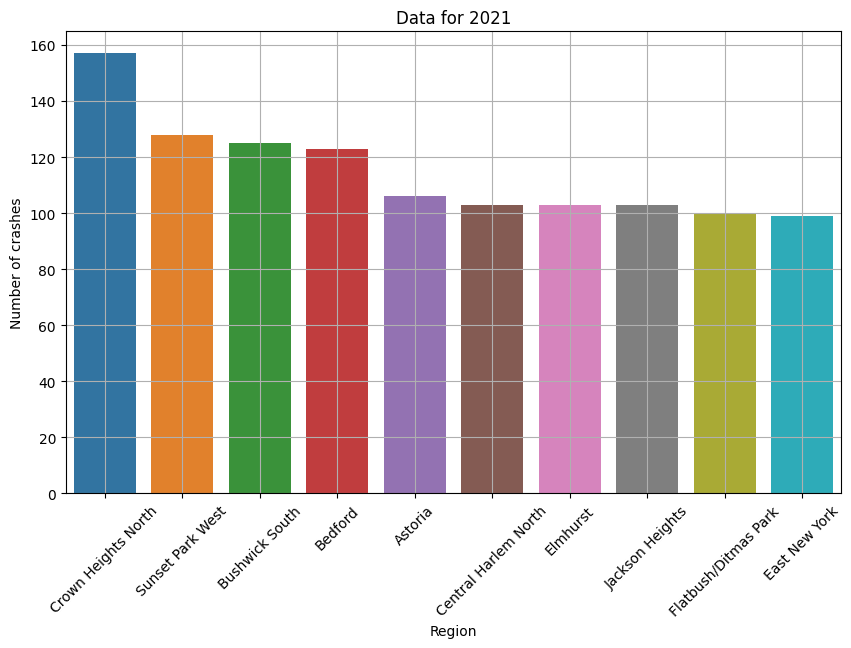

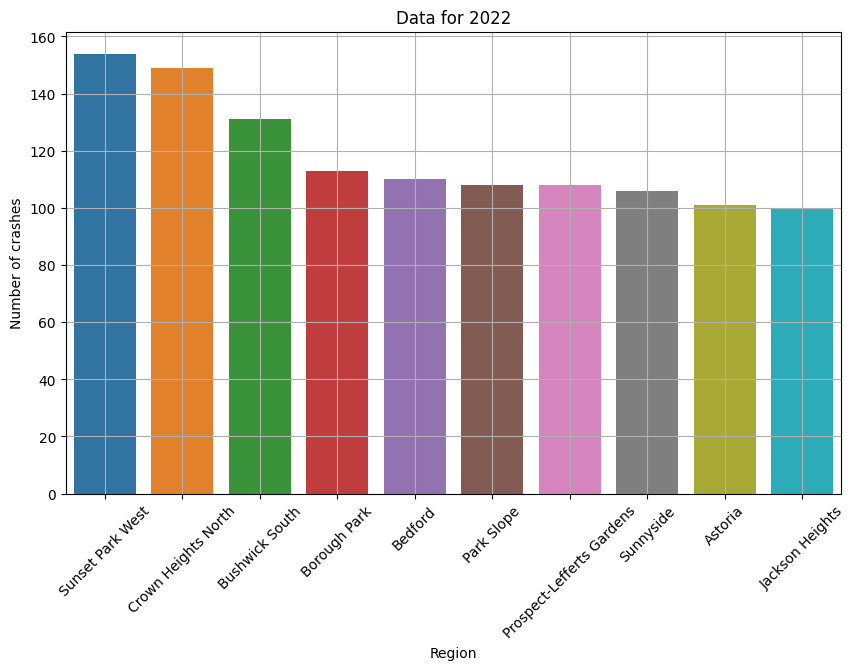

In [16]:
options=df['year'].unique()
for x in options:
    plot_data(x, save = True)

/tmp/ipykernel_43560/800232980.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bar_plots['region'], y=bar_plots["count"], palette=colors)


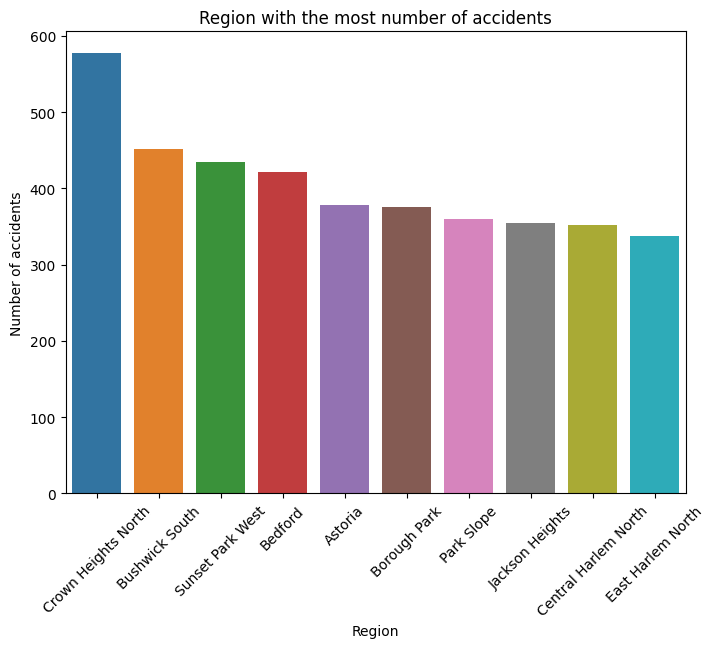

In [17]:
bar_plots=groupby_year_zone.groupby("region")["count"].sum()
bar_plots=bar_plots.reset_index()
bar_plots = bar_plots.sort_values(by=['count'], ascending=False).head(10)

colors = sns.color_palette('tab10', n_colors=10)

plt.figure(figsize=(8,6))
plt.title("Region with the most number of accidents")
sns.barplot(x=bar_plots['region'], y=bar_plots["count"], palette=colors)
plt.xlabel("Region")
plt.ylabel("Number of accidents")
plt.xticks(rotation=45)
plt.savefig(path_img + 'region_crashes_total.png', bbox_inches = 'tight')

In [18]:
df_coordinates = points_gdf
coordinate_freq = df_coordinates.groupby(['LATITUDE', 'LONGITUDE']).size().reset_index(name='frequency')
coordinate_freq

LATITUDE  LONGITUDE  frequency
0      40.505013 -74.240740          1
1      40.505527 -74.238190          1
2      40.506756 -74.233070          1
3      40.507730 -74.230064          1
4      40.509990 -74.243744          1
...          ...        ...        ...
16209  40.904835 -73.848840          1
16210  40.905174 -73.854170          1
16211  40.905310 -73.849495          1
16212  40.905890 -73.905720          1
16213  40.906340 -73.896492          1

[16214 rows x 3 columns]

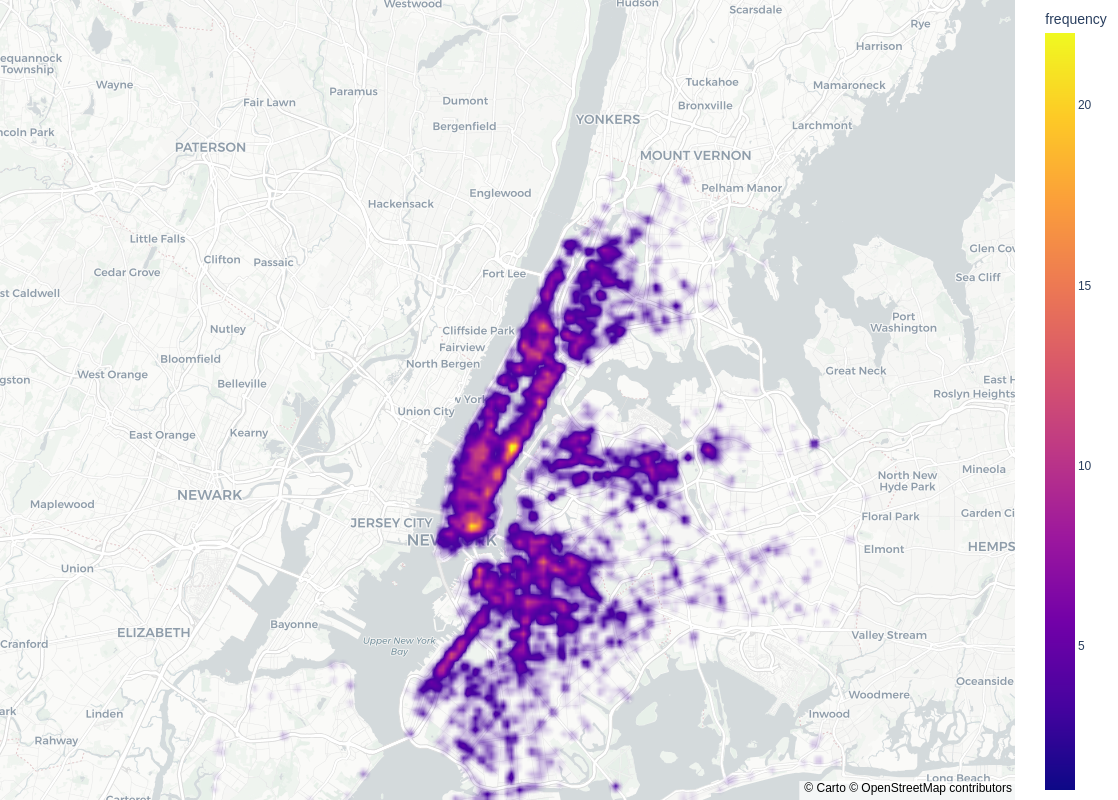

In [19]:
# Create the density mapbox plot
fig = px.density_mapbox(coordinate_freq, lat='LATITUDE', lon='LONGITUDE', z='frequency',
                        radius=8,
                        center=dict(lat=40.785, lon=-73.968),
                        zoom=10,
                        mapbox_style='carto-positron')

# Adjust figure size and layout
fig.update_layout(
    autosize=False,
    width=1200,  # Adjust width as needed
    height=800,  # Adjust height as needed
    margin=dict(l=0, r=0, t=0, b=0)  # Adjust margins as needed
)

# Save the plot to an HTML file
plotly.offline.plot(fig, filename='crashes_heatmap.html', auto_open=False)

# Show the plot
fig.show()

In [20]:
### We finish with spatial analysis, we do time analysis

In [21]:
# Filter crashes where region is not null
# crashes = crashes[crashes['LOCATION'].notnull()]

has_location_not_null = crashes['LOCATION'].isnull().any()

# Print the result
if has_location_not_null:
    print("There are tuples with non-null values in the 'LOCATION' column.")
else:
    print("There are no tuples with non-null values in the 'LOCATION' column.")

There are no tuples with non-null values in the 'LOCATION' column.


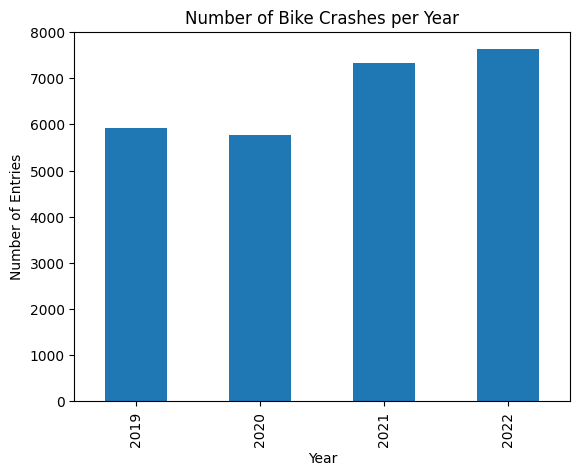

In [22]:
# Create a histogram of the 'year' column
crashes['year'].value_counts().sort_index().plot(kind='bar')

# Set the title and labels
plt.title('Number of Bike Crashes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Entries')

plt.savefig(path_img + 'bike_crashes_per_year.png', bbox_inches = 'tight')


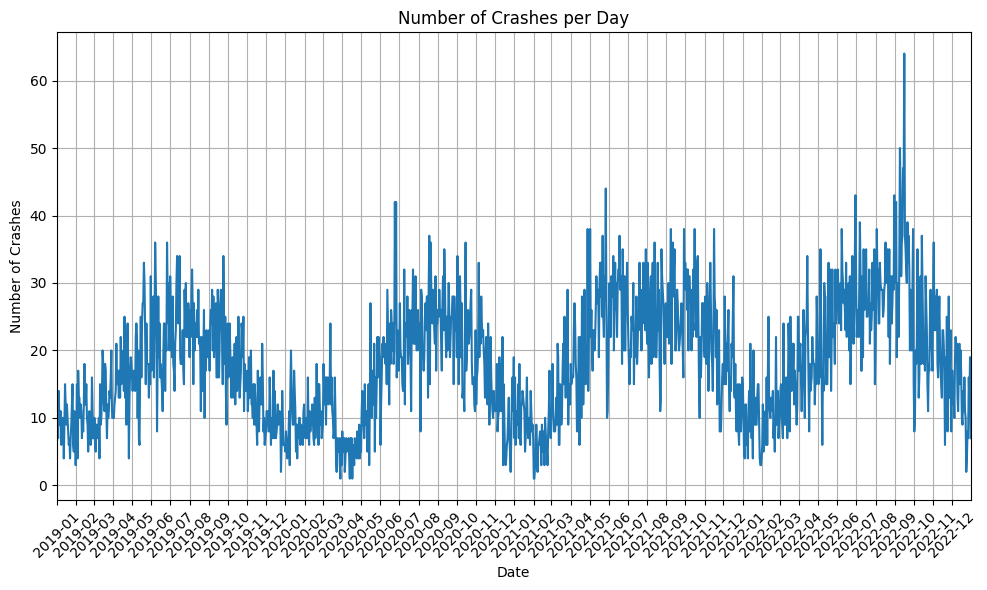

In [23]:
# Make a copy of the original DataFrame
new_crashes = crashes.copy()

# Convert 'CRASH DATE' column to datetime format
new_crashes['CRASH DATE'] = pd.to_datetime(new_crashes['CRASH DATE'])

# Set 'CRASH DATE' column as the index
new_crashes.set_index('CRASH DATE', inplace=True)

# Plot the time series
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))  # Set the figure size
ax = new_crashes.resample('D').size().plot()  # Resample the data by day and plot the count

# Customize the x-axis ticks to display both dates and months
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('Number of Crashes per Day')  # Set the title
plt.xlabel('Date')  # Set the x-axis label
plt.ylabel('Number of Crashes')  # Set the y-axis label
plt.grid(True)  # Add grid lines
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig(path_img + 'bike_crashes_per_day.png', bbox_inches = 'tight')

/tmp/ipykernel_43560/239562838.py:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



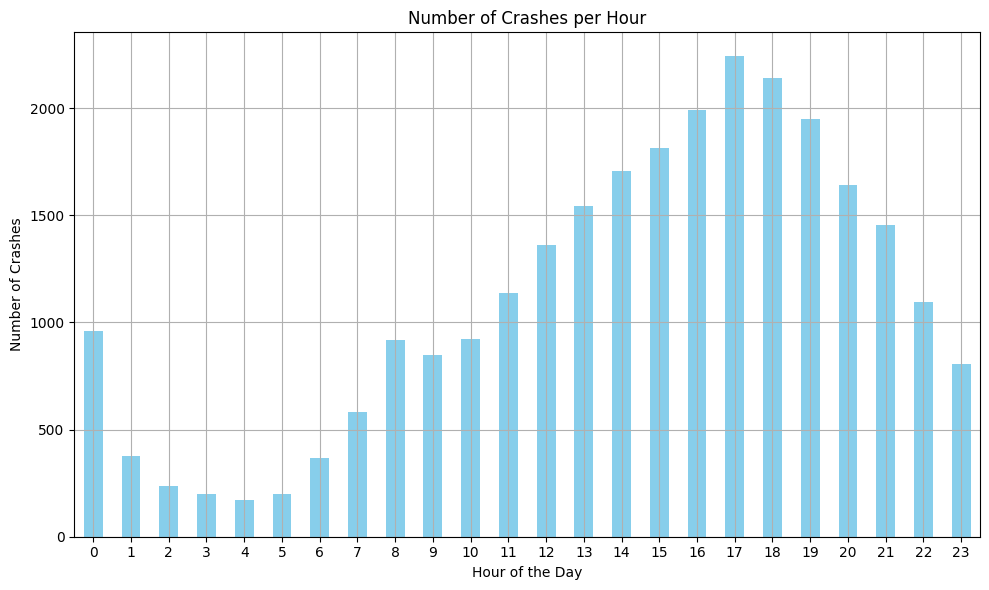

In [24]:
# Make a copy of the original DataFrame
new_crashes = crashes.copy()

# Convert 'CRASH TIME' column to datetime format
new_crashes['CRASH TIME'] = pd.to_datetime(new_crashes['CRASH TIME'])

# Plot the time series
plt.figure(figsize=(10, 6))  # Set the figure size
new_crashes['CRASH TIME'].dt.hour.value_counts().sort_index().plot(kind='bar', color='skyblue')

plt.title('Number of Crashes per Hour')  # Set the title
plt.xlabel('Hour of the Day')  # Set the x-axis label
plt.ylabel('Number of Crashes')  # Set the y-axis label
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(True)  # Add grid lines
plt.tight_layout()  # Adjust layout
plt.savefig(path_img + 'bike_crashes_per_hour.png', bbox_inches = 'tight')

In [25]:
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
crashes['day'] = crashes['CRASH DATE'].apply(lambda x : days_of_week[x.weekday()])
groupby_day = crashes.groupby('day').size().reset_index(name='frequency')
groupby_day.set_index('day', inplace=True)
groupby_day = groupby_day.reindex(days_of_week)
groupby_day

/tmp/ipykernel_43560/3832906384.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



frequency
day                 
Monday          3515
Tuesday         3849
Wednesday       3963
Thursday        4006
Friday          4274
Saturday        3805
Sunday          3240

<Figure size 1000x600 with 0 Axes>

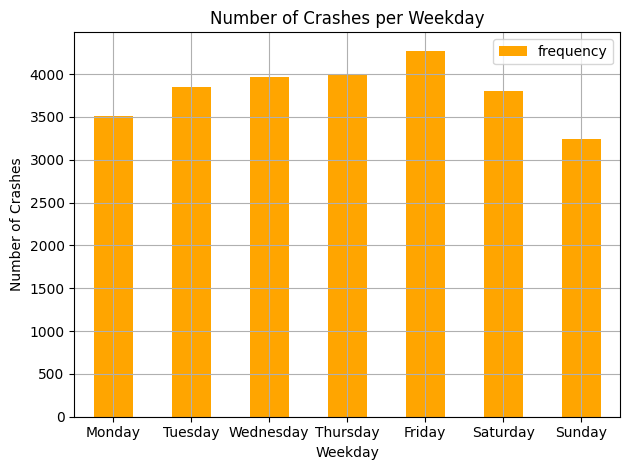

In [26]:
# Plot the time series
plt.figure(figsize=(10, 6))  # Set the figure size
groupby_day.plot(kind='bar', color='orange')

plt.title('Number of Crashes per Weekday')  # Set the title
plt.xlabel('Weekday')  # Set the x-axis label
plt.ylabel('Number of Crashes')  # Set the y-axis label
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(True)  # Add grid lines
plt.tight_layout()  # Adjust layout
plt.savefig(path_img + 'bike_crashes_per_weekday.png', bbox_inches = 'tight')

In [27]:
def custom_bike_date_parser(date_str):
    return pd.to_datetime(date_str, format='ISO8601')

In [28]:
daytime = crashes.copy()

In [29]:
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
part_of_day_order = ['Morning', 'Afternoon', 'Evening', 'Night']


groupby_day = crashes.copy()
groupby_day['day'] = groupby_day['CRASH DATE'].apply(lambda x : days_of_week[x.weekday()])
daytime['time'] = pd.to_datetime(daytime['CRASH TIME'])

# print(crashes['CRASH TIME'].dtype)

groupby_day.loc[(daytime['time'].dt.hour >= 2) & (daytime['time'].dt.hour < 12) , 'partOfDay'] = 'Morning'
groupby_day.loc[(daytime['time'].dt.hour >= 12) & (daytime['time'].dt.hour < 16) , 'partOfDay'] = 'Afternoon'
groupby_day.loc[(daytime['time'].dt.hour >= 16) & (daytime['time'].dt.hour < 19) , 'partOfDay'] = 'Evening'
groupby_day.loc[(daytime['time'].dt.hour >= 19) | (daytime['time'].dt.hour < 2) , 'partOfDay'] = 'Night'
part_of_day = groupby_day.groupby(['day', 'partOfDay']).size().reset_index(name='Count')
part_of_day['day'] = pd.Categorical(part_of_day['day'], categories=days_of_week, ordered=True)
part_of_day['partOfDay'] = pd.Categorical(part_of_day['partOfDay'], categories=part_of_day_order, ordered=True)

pivot_df = part_of_day.pivot(index='day', columns='partOfDay', values='Count')

# Reorder columns to match the desired order
pivot_df = pivot_df[['Morning', 'Afternoon', 'Evening', 'Night']]

/tmp/ipykernel_43560/3345507138.py:7: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



<Figure size 1000x600 with 0 Axes>

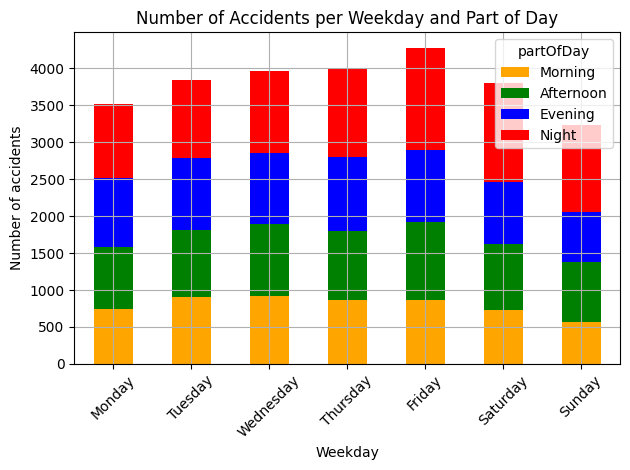

In [30]:
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True, color=['orange', 'green', 'blue', 'red'])

plt.title('Number of Accidents per Weekday and Part of Day')
plt.xlabel('Weekday')
plt.ylabel('Number of accidents')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig(path_img + 'bike_accidents_part_of_day.png', bbox_inches = 'tight')